In [52]:
import keras
import numpy as np
import foolbox
import matplotlib.pyplot as plt
from scipy import misc
from keras.applications.resnet50 import preprocess_input
from keras.applications.resnet50 import decode_predictions
import numpy as np


In [53]:
keras.backend.set_learning_phase(0)
kmodel = keras.applications.resnet50.ResNet50(weights='imagenet')
preprocessing = (np.array([104, 116, 123]), 1)
model = foolbox.models.KerasModel(kmodel, bounds=(0, 255), preprocessing=preprocessing)

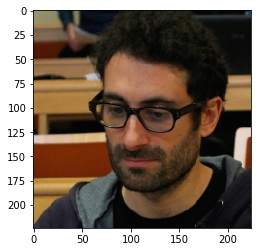

In [70]:
image = misc.imread('christophe.png', mode= 'RGB')
image = image[10:234,0:224,0:3]/255
plt.imshow(image)
plt.show()
label = np.argmax(model.predictions(image))

In [55]:
attack = foolbox.attacks.LBFGSAttack(model=model, criterion=foolbox.criteria.TargetClassProbability(120, p=.90))
adversarial = attack(image[:, :, ::-1], label)

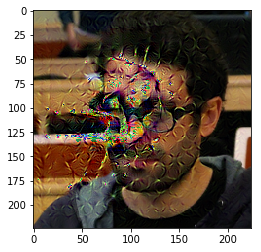

In [56]:
plt.imshow(adversarial[:, :, ::-1])
plt.show()

In [57]:
adversarial_rgb = adversarial[np.newaxis, :, :, ::-1]
preds = kmodel.predict(preprocess_input(adversarial_rgb.copy()))

print("Top 5 predictions (adversarial: ", decode_predictions(preds, top=5))

Top 5 predictions (adversarial:  [[('n01980166', 'fiddler_crab', 0.99933416), ('n01978455', 'rock_crab', 8.0413083e-05), ('n01986214', 'hermit_crab', 6.7951369e-05), ('n01990800', 'isopod', 6.1097213e-05), ('n01978287', 'Dungeness_crab', 4.3557073e-05)]]


### Transférabilté


On utilise maintenant un nouveau réseau de neurones avec les mêmes poids

In [58]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image 

model_bis = VGG19(weights='imagenet')

In [59]:
foolModel = foolbox.models.KerasModel(model_bis, bounds=(0, 255))

In [72]:
np.argmax(foolModel.predictions(image))


669